In [ ]:

from PIL import Image

im_file = 'data/handwritten_sample.jpeg'
im = Image.open(im_file)
print(im.size) # print size
im.show() # display image






(234, 216)


In [58]:
import cv2
img = cv2.imread('data/handwritten_sample.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
img = cv2.resize(img, (560, 900))
_, result = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)

adaptive_result = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 201, 10)

cv2.imshow("newresult", result)
cv2.imshow("adaptive_result: ", adaptive_result)
cv2.waitKey(0)


-1

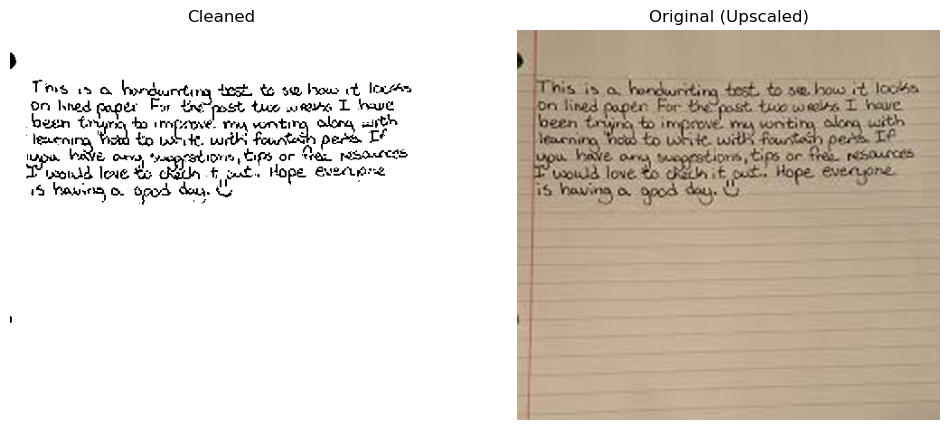

Saved using PIL as 'cleaned_handwritten_sample_pil.jpeg'


In [70]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
# Load image
img = cv2.imread('data/handwritten_sample.jpeg')

# Step 1: Upscale (4x or 2x to reduce pixelation)
upscaled = cv2.resize(img, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)

# Step 2: Denoise
denoised = cv2.fastNlMeansDenoisingColored(upscaled, None, 10, 10, 7, 21)

# Step 3: Convert to grayscale
gray = cv2.cvtColor(denoised, cv2.COLOR_BGR2GRAY)

# Step 4: Sharpen
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]]
)
sharpened = cv2.filter2D(gray, -1, kernel)

# Step 5: Thresholding
_, thresh = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display using matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Cleaned")
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Original (Upscaled)")
plt.imshow(cv2.cvtColor(upscaled, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# Convert the OpenCV image (grayscale) to a PIL image
pil_image = Image.fromarray(thresh)
# Save the image as PNG using PIL
pil_image.save("temp/cleaned_handwritten_sample_pil.jpeg")
print("Saved using PIL as 'cleaned_handwritten_sample_pil.jpeg'")
